In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df_train= pd.read_csv('data/train.csv')

In [3]:
df_test = pd.read_csv('data/test.csv')

In [37]:
df_all = pd.concat([df_train, df_test], sort=False)

In [38]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
Id               2919 non-null int64
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotFrontage      2433 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            198 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-

In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [5]:
def feature_engineering2(data):
    non_numeric = data.select_dtypes(include=object).columns.tolist()
    no_missing = list()
    for col in non_numeric:
        if data[col].notna().all():
            no_missing.append(col)
    categorize_cols(data, no_missing)
    return 

In [6]:
def categorize_cols(data, columns):
    for col in columns:
        data[col+"_cat"] = pd.factorize(data[col])[0]
    return

In [7]:
sub_train = pd.read_csv("data/train.csv")

In [13]:
feature_engineering2(sub_train)
choosen_cols = choose_cols(sub_train)
print(choosen_cols)
heal_cols(sub_train, choosen_cols)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'MSZoning_cat', 'Street_cat', 'LotShape_cat', 'LandContour_cat', 'Utilities_cat', 'LotConfig_cat', 'LandSlope_cat', 'Neighborhood_cat', 'Condition1_cat', 'Condition2_cat', 'BldgType_cat', 'HouseStyle_cat', 'RoofStyle_cat', 'RoofMatl_cat', 'Exterior1st_cat', 'Exterior2nd_cat', 'ExterQual_cat', 'ExterCond_cat', 'Foundation_cat', 'Heating_cat', 'HeatingQC_cat', 'CentralAir_cat', 'KitchenQual_cat', 'Functional_cat', 'PavedDrive_cat', 'SaleType_cat', 'SaleCondition_cat']


In [14]:
sub_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 108 entries, Id to SaleCondition_cat
dtypes: float64(3), int64(62), object(43)
memory usage: 1.2+ MB


In [15]:
X = sub_train[choosen_cols]

In [16]:
y = sub_train['SalePrice']

In [17]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [26]:
def mae(model, trX, valX, trY, valY):
    model.fit(trX,trY)
    #print(max(model.feature_importances_))
    predictionTest = model.predict(valX)
    predictionTrain = model.predict(trX)
    return mean_absolute_error(valY, predictionTest), mean_absolute_error(trY,predictionTrain)

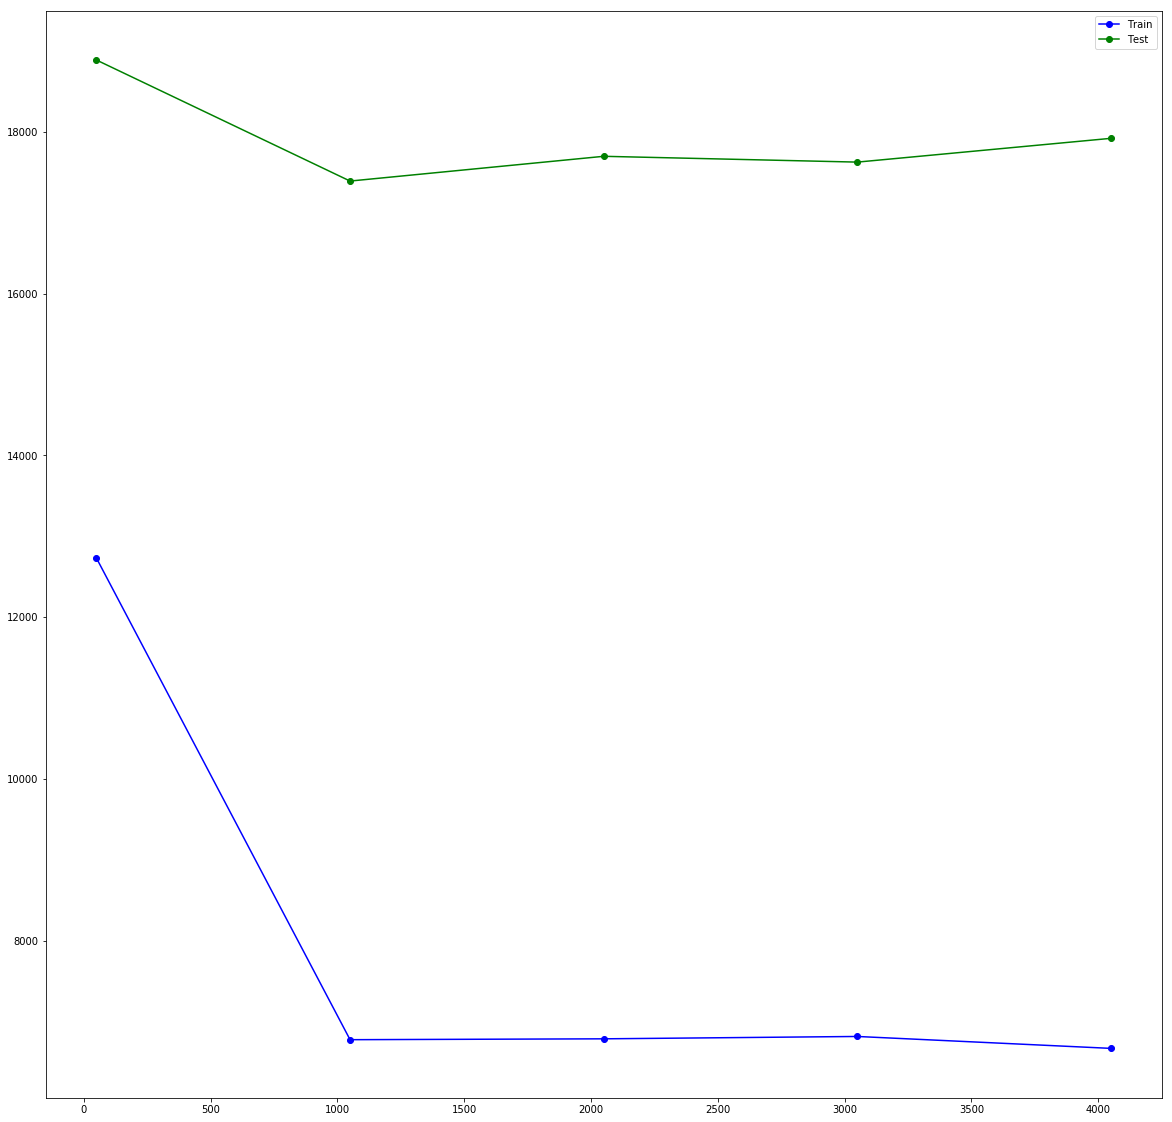

17390.789588834403
best max_leaf is 1050


In [29]:
train_result = list()
test_result = list()
leafs = list()
min_test = 10000000
best_leaf = 5007
for max_leaf in range(50,5000,1000):
    model = RandomForestRegressor(n_estimators=110, max_leaf_nodes= max_leaf, n_jobs=-1)
    test , train = mae(model,X_train, X_test, y_train, y_test)
    train_result.append(train)
    test_result.append(test)
    min_test = min(min_test, test)
    if min_test == test:
        best_leaf = max_leaf
    leafs.append(max_leaf)
plt.figure(figsize=(20,20))
plt.plot(leafs, train_result, 'bo-', label='Train')
plt.plot(leafs, test_result, 'go-', label='Test')
plt.legend(loc='best')
plt.show()
print(min_test)
print('best max_leaf is %d'%(best_leaf))

In [10]:
def feature_engineering(data):
    data['Neighborhood_cat'] = pd.factorize(data.Neighborhood)[0]
    data['LotShape_cat'] = pd.factorize(data.LotShape)[0]
    data['BldgType_cat'] = pd.factorize(data.BldgType)[0]
    data['HouseStyle_cat'] = pd.factorize(data.HouseStyle)[0]
    data['MSZoning_cat'] = pd.factorize(data.MSZoning)[0]
    

In [11]:
def heal_cols(data,cols):
    for col in cols:
        data[col].fillna(value=int(data[col].mean()), inplace=True)
    

In [12]:
def choose_cols(data):
    black_list = ['Id', 'SalePrice']
    choosen_cols = data.select_dtypes(include=np.number).columns.tolist()
    for col in choosen_cols:
        if col in black_list:
            choosen_cols.remove(col)
    return choosen_cols

In [63]:
important_cols = list()

In [78]:
important_cols

['OverallQual',
 'GrLivArea',
 'TotalBsmtSF',
 'BsmtFinSF1',
 '2ndFlrSF',
 '1stFlrSF',
 'GarageCars',
 'GarageArea',
 'LotArea',
 'YearBuilt',
 'LotFrontage']

In [79]:
def make_prediction( model, data_all, important_cols):
    feature_engineering2(data_all)
    choosen_cols = important_cols
    #choosen_cols = choose_cols(data_all)
    heal_cols(data_all, choosen_cols)
    print(choosen_cols)
  #  heal_cols(test_data, choosen_cols)
   # heal_cols(train_data, choosen_cols)
    test_data = data_all[data_all.SalePrice.isnull()]
    train_data = data_all[data_all.SalePrice.notna()]
    test_X = test_data[choosen_cols]
    train_X = train_data[choosen_cols]
    train_y = train_data['SalePrice']
    model.fit(train_X, train_y)
    print(model.feature_importances_)
    feature_importances = pd.DataFrame(model.feature_importances_, index = choosen_cols, columns=['importance']).sort_values('importance', ascending=False)
    important_cols = feature_importances.index.tolist()[:11]
    print(important_cols)
    print(feature_importances)
#   for i in range(0,len(model.feature_importances_)):
  #      print('feature name %s \t\t feature importance %d'%(choosen_cols[i], np.round(model.feature_importances_[i],3)))
    prediction = model.predict(test_X)
    solution = pd.DataFrame({'Id':test_data.Id, 'SalePrice':prediction})
    solution.to_csv('output/solution_more_cols_cat_nest_cols_reduced.csv', index=False)
    return important_cols

In [48]:
df1 = pd.DataFrame({'col1':['2','2','5','adf'],'col2':[2,4,5,6]})
df2 = pd.DataFrame({'col2':[5,3,6,2,1,563,2]})
df3 = pd.concat([df1, df2], sort=False)
df3
cond = df3.col1.notna()
get_df1 = df3[cond]
get_df1

,col1,col2
0,2,2
1,2,4
2,5,5
3,adf,6


In [80]:
model = RandomForestRegressor(n_estimators = 110, max_leaf_nodes=1050, n_jobs=-1, random_state = 0)
important_cols = make_prediction(model, df_all, important_cols)


['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'BsmtFinSF1', '2ndFlrSF', '1stFlrSF', 'GarageCars', 'GarageArea', 'LotArea', 'YearBuilt', 'LotFrontage']
[0.59987249 0.12300042 0.04895373 0.04122944 0.03849262 0.03424492
 0.0260662  0.02435317 0.02385074 0.02540153 0.01453475]
['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'BsmtFinSF1', '2ndFlrSF', '1stFlrSF', 'GarageCars', 'YearBuilt', 'GarageArea', 'LotArea', 'LotFrontage']
             importance
OverallQual    0.599872
GrLivArea      0.123000
TotalBsmtSF    0.048954
BsmtFinSF1     0.041229
2ndFlrSF       0.038493
1stFlrSF       0.034245
GarageCars     0.026066
YearBuilt      0.025402
GarageArea     0.024353
LotArea        0.023851
LotFrontage    0.014535


In [ ]:
grouped_data = avg_price_data.groupby('YearBuilt').mean()

In [ ]:
grouped_data.sort_values('YearBuilt', inplace=True)
grouped_data.head()

In [ ]:
grouped_data.plot();